In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
folder = "./chest_xray"
train_path = folder + '/train'
valid_path = folder +'/valid'
test_path = folder + '/test'

In [3]:
test_batches = ImageDataGenerator(preprocessing_function=tf.image.per_image_standardization).flow_from_directory(directory=test_path, target_size=(224,224),  classes=["normal","pneumonia"],batch_size=1, shuffle=False)

Found 741 images belonging to 2 classes.


In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


2022-03-19 00:17:22.497631: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-19 00:17:22.910417: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4119 MB memory:  -> device: 0, name: Quadro P2000, pci bus id: 0000:65:00.0, compute capability: 6.1
2022-03-19 00:17:24.464647: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


Confusion matrix, without normalization
[[312  33]
 [ 51 345]]


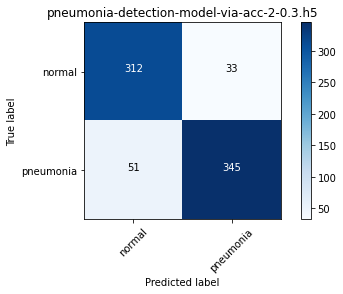

In [5]:
#import os
#for file in os.listdir("./"):
#    if file.endswith(".h5"):
#        filename = file
filename = "pneumonia-detection-model-via-acc-2-0.3.h5"
model = tf.keras.models.load_model(filename)
predictions = model.predict(test_batches)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ["normal","pneumonia"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=filename)